In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import os
import shutil
import random
import matplotlib.pyplot as plt

In [3]:
# # Script to Prepare Training and Validation Set : Caltech 101 
# split = 0.3

# basePath = os.getcwd()
# dataPath = os.path.join(basePath, "Data\\101_ObjectCategories\\train")
# labels = os.listdir(dataPath)
# valPath = os.path.join(basePath, "Data\\101_ObjectCategories\\val")

# if not os.path.isdir(valPath):
#     os.mkdir(valPath)

# for label in labels:
#     dataFiles = os.listdir(os.path.join(dataPath, label))
#     totalData = len(dataFiles)
#     valIndex = random.sample(range(totalData-1), int(totalData*split))
#     print(valIndex)
    
#     for indx in valIndex:
#         filePath = os.path.join(dataPath, label, dataFiles[indx])
#         print(filePath)
#         destDir = os.path.join(valPath, label)
#         destPath = os.path.join(valPath, label, dataFiles[indx])
#         if not os.path.isdir(destDir):
#             os.mkdir(destDir)
#         shutil.move(filePath, destPath)

In [4]:
PATH = "C://Users//anubrata//Pictures//dogscats/"
train_data_dir = f"{PATH}train"
validation_data_dir = f"{PATH}val"
labels = os.listdir(f"{PATH}val")
labels

['cats', 'dogs']

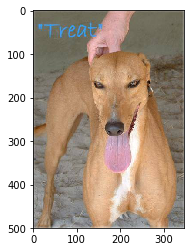

In [5]:
files = os.listdir(f'{PATH}val/dogs')

img = plt.imread(f'{PATH}val/dogs/{files[1]}')
plt.imshow(img)

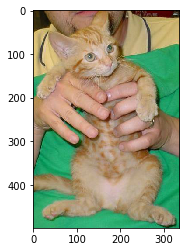

In [6]:
files = os.listdir(f'{PATH}val/cats')
img = plt.imread(f'{PATH}val/cats/{files[1]}')
plt.imshow(img)

In [7]:
img.shape

(499, 336, 3)

In [8]:
img[:2, :2]

array([[[60, 58, 10],
        [60, 57, 14]],

       [[56, 54,  6],
        [56, 53, 10]]], dtype=uint8)

In [9]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications
from keras import optimizers

C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [10]:
# dimensions of our images.
img_width, img_height = 150, 150

nb_train_samples = 2000
nb_validation_samples = 800
epochs = 50
batch_size = 16

In [11]:
datagen = ImageDataGenerator(rescale=1. / 255)

# build the VGG16 network
model = applications.VGG16(include_top=False, weights='imagenet')

generator = datagen.flow_from_directory(train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)

Found 2000 images belonging to 2 classes.


In [12]:
bottleneck_features_train = model.predict_generator(
        generator, nb_train_samples // batch_size)

In [13]:
bottleneck_features_validation = model.predict_generator(
        generator, nb_validation_samples // batch_size)

In [14]:
np.save(open("bottleneck_features_validation.npy", "wb"),
            bottleneck_features_validation)
np.save(open("bottleneck_features_train.npy", "wb"),
            bottleneck_features_train)

In [15]:
print(len(bottleneck_features_validation))
print(len(bottleneck_features_train))

800
2000


In [16]:
train_data = np.load(open('bottleneck_features_train.npy', "rb"))
train_labels = np.array([0] * int(nb_train_samples / 2) + [1] * int(nb_train_samples / 2))
print(len(train_labels))

2000


In [22]:
validation_data = np.load(open('bottleneck_features_validation.npy', "rb"))
validation_labels = np.array(
        [0] * int(nb_validation_samples / 2) + [1] * int(nb_validation_samples / 2))
print(len(validation_labels))

800


In [42]:
model = Sequential()
model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
                  loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, train_labels,
              epochs=epochs,
              batch_size=batch_size,
              validation_data=(validation_data, validation_labels))

Train on 2000 samples, validate on 800 samples
Epoch 1/50
2000/2000 [==============================] - 1s 635us/step - loss: 0.6722 - acc: 0.5965 - val_loss: 0.7752 - val_acc: 0.5112
Epoch 2/50
2000/2000 [==============================] - 1s 330us/step - loss: 0.5306 - acc: 0.7455 - val_loss: 0.7782 - val_acc: 0.5075
Epoch 3/50
2000/2000 [==============================] - 1s 314us/step - loss: 0.4694 - acc: 0.7935 - val_loss: 0.8844 - val_acc: 0.5100
Epoch 4/50
2000/2000 [==============================] - 1s 313us/step - loss: 0.4268 - acc: 0.8100 - val_loss: 0.8588 - val_acc: 0.5038
Epoch 5/50
2000/2000 [==============================] - 1s 317us/step - loss: 0.4112 - acc: 0.8190 - val_loss: 0.8990 - val_acc: 0.4963
Epoch 6/50
2000/2000 [==============================] - 1s 335us/step - loss: 0.3941 - acc: 0.8225 - val_loss: 0.9565 - val_acc: 0.5012
Epoch 7/50
2000/2000 [==============================] - 1s 319us/step - loss: 0.3787 - acc: 0.8325 - val_loss: 1.0561 - val_acc: 0.5050
E

In [43]:
# from IPython.display import SVG
# from keras.utils.vis_utils import model_to_dot

# SVG(model_to_dot(model).create(prog='dot', format='svg'))

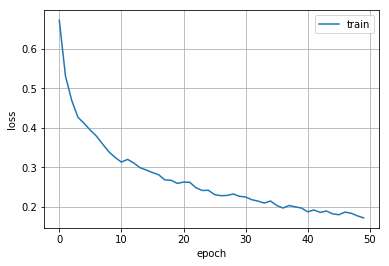

In [44]:
# plot loss vs # model epochs trained
#plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
#plt.legend(['valid','train'])
plt.legend(['train'])

Text(0,0.5,'accuracy')

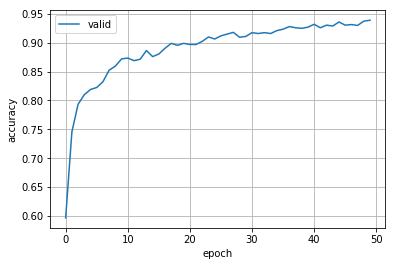

In [45]:
# plot accuracy vs # epochs
#plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])
plt.legend(['valid','train'])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')

Reference: Keras Tutorial https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html 